# **Outlier Detection Using Random Forest - Isolation Forest**

In simple, it means we are going to discuss how to detect outliers using Isolation forest method in Random Forest Algorithm  
<br />
## **Outlier**
<br />

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error. An outlier can cause serious problems in statistical analyses, that's why they have to be removed.
<br />

>Outlier = Anomaly = Unusual Data Point

![Outlier](https://datascience.foundation/img/pdf_images/knowing_all_about_outliers_in_machine_learning_sample_points_in_green_are_near_to_each_other.jpg)  

Outlier detection [or Anomaly detection] is the process of finding the outliers in the data, i.e. points that are significantly different from the majority of the other data points.

Real-world datasets have very complicated patterns that are difficult to detect by just looking at the data. That's why the study of outlier detection is an extremely important application of Machine Learning, otherwise it could cause serious problems as all the models use data, so if there is defect in data then there would be defect in the working of that model also.

Now lets understand a little bit about Isolation forest
<br /><br />
## **Isloation Forest**
<br />
Isolation Forests, similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model. This is an unsupervised anomaly detection technique.  

Isolation Forest Algorithm was built, based on the fact that anomalies are the data points that are “few and different”.  
In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.
![Iforest](https://www.relataly.com/wp-content/uploads/2021/06/image-40-1024x427.png)
>Isloation Tree  

<br /> 
<br />  

## **Why Isolation Forest ?**  
<br />

The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points.  
Isolation Forest, like any tree ensemble method, is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.  
<br />

## **Working Of Isolation Forest**
In an Isolation Forest, first data is divided into different samples. As we see in the below image the first line of blue dots is a sample data of a long data set.
![Sub-Sample](Isolation-forest.png)
> Red Dots => Isolated data points  
Blue Dots => Grouped data points  

Now after selection of sample we randomly divide that data. As we can see in the above image it is divided using those dotted black lines. And we keep this process going on untill all the data points are isolated. This what **Isolation** in Isolation Forest stands for. And as we can understand from the image these red dots are isloated data pints.  

Now as this is just one sample of a whole data set. We do the same for all the data-sets.
![Isolation_Forest](https://pubs.rsc.org/image/article/2016/ay/c6ay01574c/c6ay01574c-f1_hi-res.gif)
Now as you can see these different-different trees, these are nothing but different samples from the whole data set.  
>And all these trees together are called **forest**, *[as forest contains lots of trees]*. So, together these are called **Isolation Forest**.  
  
The red dots which are visible in some trees are *outliers*. Now you might be wondering why in some the outpier is not present. It is because in samples when we start dividing randomly, and on the first division itself the data point that gets isolated is the outlier. And whereas in some samples the data points gets isolated while dividing after 2-3 times, which states that, these data points are not unusal data points like outliers. So this is why some trees have outliers and some trees dont. And in the end outliers are few therefore not it is necessary that only few trees should contain them.  
And as you all can see outlier is in only at the top of tree which also states that when we start randomly diving samples it got isolated in intial stages.


Now since we are working on outlier dtetection, an anomaly score is required for decision making. In the case of Isolation Forest, it is defined as:
![23](https://miro.medium.com/max/654/1*Zha5PJSauUmig8gstAjflg.png)  
where h(x) is the path length of observation x, c(n) is the average path length of unsuccessful search in a Binary Search Tree and n is the number of external nodes. 
>Each observation is given an anomaly score and the following decision can be made on its basis:
>1. A score close to 1 indicates anomalies  
>2. Score much smaller than 0.5 indicates normal 
observations  
>3. If all scores are close to 0.5 then the entire sample does not seem to have clearly distinct anomalies

## **Implementation**   
<br />  

Now lets have some hands-on how to detect **outliers** using **Isolation Forest**.  
First, we need to generate the observations. So, we will start with observations that will be considered normal and will be used to train the model. The second group is new observations, coming from the same distribution as the training ones. Lastly, we generate outliers.  

In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest

# default plot settings
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

Below is the generated dataset.As desired, training and ‘normal’ observations are basically stacked on each other, while outliers are spread over. Due to the random nature of the outliers, some of them are overlapping with the training/normal observations, but I will account for that later.

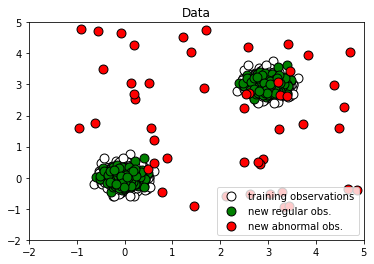

In [3]:
# Plotting generated data ----

plt.title("Data")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_test.x1, X_test.x2, c='green',
                 s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.x1, X_outliers.x2, c='red',
                s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "new regular obs.", "new abnormal obs."],
           loc="lower right")

# saving the figure
plt.savefig('generated_data.png', dpi=300)

plt.show()

Now we need to train the Isolation Forest on the training set. One thing worth noting is the contamination parameter, which specifies the percentage of observations we believe to be outliers (scikit-learn’s default value is 0.1).

In [4]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

Okay, so now we have the predictions. How to assess the performance? We know that the test set contains only observations from the same distribution as the normal observations. So, all of the test set observations should be classified as normal. And vice versa for the outlier set. Let’s look at the accuracy.

In [5]:
# new, 'normal' observations
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])

Accuracy: 0.93


In [6]:
# outliers
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy: 0.96


At first, this looks pretty good, especially considering the default settings, however, there is one issue still to consider. As the outlier data was generated randomly, some of the outliers are actually located within the normal observations. To inspect it more carefully, we will plot the normal observation dataset together with a labeled outlier.

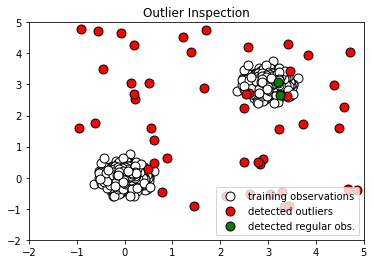

In [7]:
# Inspecting the outliers ----

# adding the predicted label
X_outliers = X_outliers.assign(y = y_pred_outliers)

plt.title("Outlier Inspection")

p1 = plt.scatter(X_train.x1, X_train.x2, c='white',
                 s=20*4, edgecolor='k')
p2 = plt.scatter(X_outliers.loc[X_outliers.y == -1, ['x1']], 
                 X_outliers.loc[X_outliers.y == -1, ['x2']], 
                 c='red', s=20*4, edgecolor='k')
p3 = plt.scatter(X_outliers.loc[X_outliers.y == 1, ['x1']], 
                 X_outliers.loc[X_outliers.y == 1, ['x2']], 
                 c='green', s=20*4, edgecolor='k')

plt.axis('tight')
plt.xlim((-2, 5))
plt.ylim((-2, 5))
plt.legend([p1, p2, p3],
           ["training observations",
            "detected outliers", 
            "detected regular obs."],
           loc="lower right")

# saving the figure
plt.savefig('outlier_inspection.png', dpi=300)

plt.show()

## **Applications of Outlier Detection**
There are many real-world applications of outlier detection:  

1. **Industrial damage**: In the conditions of industrial automation, anomaly detection systems use data coming from numerous sensors to identify any malfunctions in the machinery, thus able to detect abnormalities early to prevent further damage or manufacturing defects.
2. **Fraud**: Graph-based anomaly detection (GBAD) is used to prevent fraud with credit cards, bank accounts, and insurance. ML systems also enable online banking fraud with the help of behavioral biometrics that also detects anomalies in consumer spending in real-time.
3. **Health Care**: Outlier identification has been applied in clinical settings in a variety of ways. For instance, the density-based clustering method can be applied to patient careflow log analysis to see whether the particular patient's careflow trace is anomalous. Anomaly detection in medical image analysis is helpful in accurate diagnostics, while treatment plan analysis may help determine potentially fatal errors in the treatment plans.
4. **Stock trading**: Anomaly detection algorithms deal quite well with the big masses of unstructured data in the stock exchanges, be it regular stocks or cryptocurrencies. ML systems classify the available data about price movements and sales volumes to detect anomalies and give alerts to the users about price outliers. This information may be instrumental in trading decision-making.  


![Isolation-With-Outlier](https://miro.medium.com/max/1400/1*4P2vi2YVj4nHbU5SZ9i7Ig.png)
>Outlier Detection Using Isolation Forest


## **References**
<br />  
* https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e 
* https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/ 